In [5]:
import re

def process_line(stdout):
    energy = []
    sign = []
    time = []
    dimer = []

    for line in str(stdout).split("\\n"):

        pat = "Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            energy = [float(line[0]), float(line[1])]


        pat = "average sign"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            sign = [float(line[0]), float(line[1])]

        pat = "Elapsed time"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.replace("sec","")
            time = [float(line)]
            
        pat = "dimer operator"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            dimer = [float(line)]
            
    return energy, sign, dimer, time

In [6]:
import os
import numpy as np
os.chdir("../build")
T =  np.logspace(-1, 1, num=10)

## calculate exact value

In [3]:
import numpy as np
E = np.load("../doc/data/shastry_exact_J1=0.4.npy")
tmp = np.einsum("i,j->ij",-1/T, E)
energy_exact = np.einsum("j,ij->i",E,np.exp(tmp))/np.einsum("ij->i", np.exp(tmp))

# original shastry-surtherland model

### sampling energies for several temperature

In [5]:
import numpy as np

In [155]:
J1 = 0.4

In [157]:
import subprocess
energy_array = []
sign_array = []
time_array = []
for t in T:
    out = subprocess.Popen(["./SS", "-L", "2", "-T", "{:.2f}".format(t), "-H", "0",  "-J1", f"{J1}", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)

T = 0.1 [-2.04059, 14.065]
T = 0.16681005372000587 [-7.10348, 8.14833]
T = 0.2782559402207124 [-4.89783, 1.15598]
T = 0.46415888336127786 [-4.00628, 0.0915892]
T = 0.774263682681127 [-2.85837, 0.0244689]
T = 1.291549665014884 [-1.85961, 0.0177858]
T = 2.1544346900318834 [-1.12001, 0.0200129]
T = 3.593813663804626 [-0.69139, 0.0245314]
T = 5.994842503189409 [-0.415548, 0.0309403]
T = 10.0 [-0.249427, 0.0395795]


In [158]:
energy_v1 = np.array(energy_array)
sign_v1 = np.array(sign_array)

### plot together with exact value

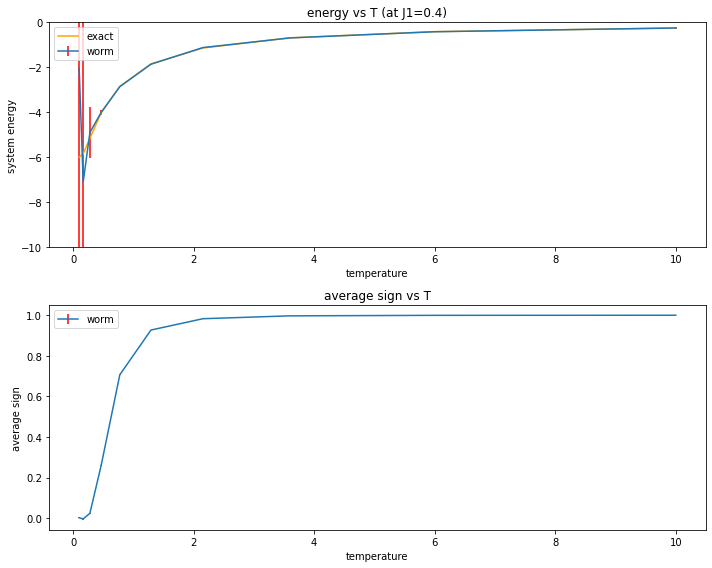

In [174]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
 
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(T[0:],energy_v1[0:,0], yerr = energy_v1[0:,1], ecolor='red', label='worm')
ax1.plot(T[0:],energy_exact, color='orange',label = 'exact')
ax1.set_title(f'energy vs T (at J1={J1})')
ax1.set_xlabel('temperature')
ax1.set_ylabel('system energy')
ax1.set_ylim(-10, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)
ax1.errorbar(T[0:],sign_v1[0:,0], yerr = sign_v1[0:,1], ecolor='red',label='worm')
ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()


fig.savefig(f"../doc/img/shastry_v1_J1={J1}.png")
plt.show()


# unitary transformed shastry-surtherland model

In [160]:
energy_array = []
sign_array = []
time_array = []
dmer_array = []
T =  np.logspace(-1, 1, num=10)
for t in T:
    out = subprocess.Popen(["./main", "-L", "2", "-T", "{:.2f}".format(t), "-H", "0",  "-J1", f"{J1}", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry_v2"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
#     print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    dimer_array.append(dimer)


In [161]:
energy_v2 = np.array(energy_array)
sign_v2 = np.array(sign_array)
dimer_v2 = np.array(dimer_array)

### plot together with exact value

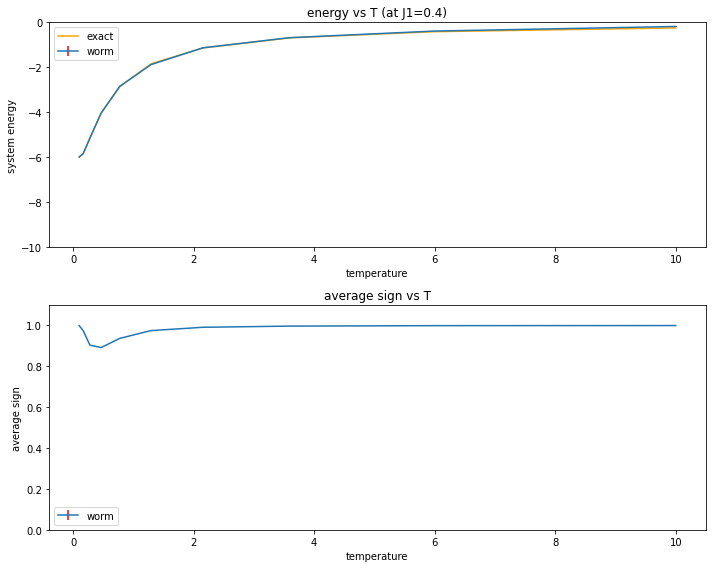

In [173]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(T[0:],energy_v2[0:,0], yerr = energy_v2[0:,1], ecolor='red', label='worm')
ax1.plot(T[0:],energy_exact, color='orange',label = 'exact')
ax1.set_title(f'energy vs T (at J1={J1})')
ax1.set_xlabel('temperature')
ax1.set_ylabel('system energy')
ax1.set_ylim(-10, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)
ax1.errorbar(T[0:],sign_v2[0:,0], yerr = sign_v2[0:,1], ecolor='red',label='worm')
ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()
ax1.set_ylim(0,1.1)

plt.tight_layout()

fig.savefig(f"../doc/img/shastry_v2_J1={J1}.png")
plt.show()


## compare energy

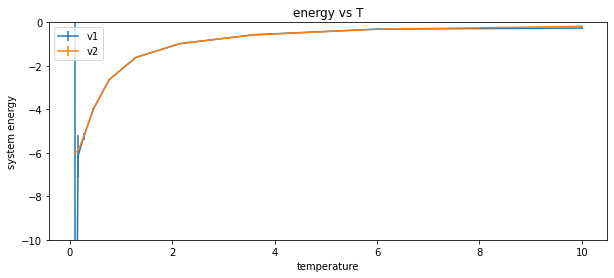

In [84]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,4))
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(1,1,1)

ax1.errorbar(T[0:],energy_v1[0:,0], yerr = energy_v1[0:,1], label='v1')
ax1.errorbar(T[0:],energy_v2[0:,0], yerr = energy_v2[0:,1], label='v2')
ax1.set_title('energy vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('system energy')
ax1.set_ylim(-10, 0)
ax1.legend()
plt.savefig(f"../doc/img/comp_ene_J1={J1}.png")
plt.show()


## compare average sign

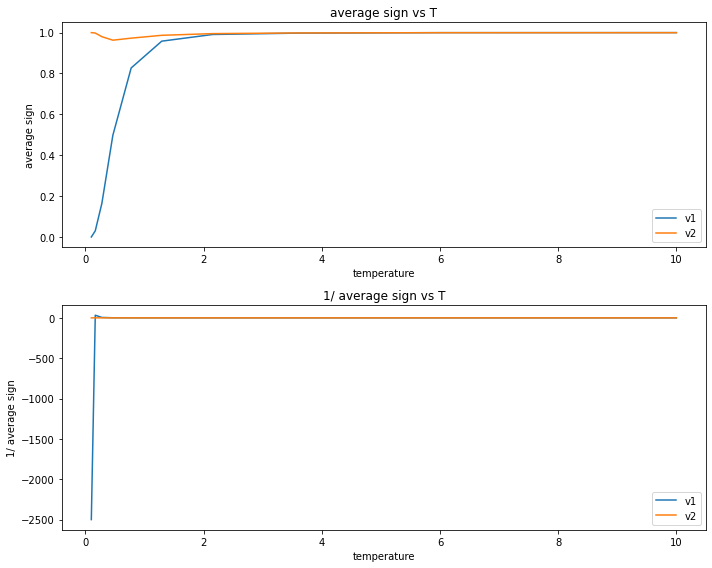

In [85]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(T[0:],sign_v1[0:,0],label='v1')
ax1.plot(T[0:],sign_v2[0:,0],label='v2')

ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()

ax1 = fig.add_subplot(2,1,2)
ax1.plot(T[0:],1/sign_v1[0:,0],label='v1')
ax1.plot(T[0:],1/sign_v2[0:,0],label='v2')

ax1.set_title('1/ average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('1/ average sign')
ax1.legend()

plt.tight_layout()

plt.savefig(f"../doc/img/avesign_J1={J1}.png")
plt.show()


# change J1 with fixed temperature (T = 1)

In [142]:
import numpy as np
J1 = np.linspace(0, 1, 21)
T = 0.1

In [143]:
import subprocess
energy_array = []
sign_array = []
time_array = []
# T =  np.logspace(-1, 1, num=50)
for j1 in J1:
    out = subprocess.Popen(["./main", "-L", "2", "-T", f"{T}", "-J1", "{:.2f}".format(j1), "-J2", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"J1 = {j1}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
energy_j_v1 = np.array(energy_array)
sign_j_v1 = np.array(sign_array)
time_j_v1 = np.array(time_array)

J1 = 0.0 [-6.00936, 0.00423081]
J1 = 0.05 [-6.00152, 0.0137596]
J1 = 0.1 [-5.99861, 0.0321037]
J1 = 0.15000000000000002 [-5.98426, 0.0709796]
J1 = 0.2 [-6.03365, 0.195705]
J1 = 0.25 [-5.86119, 0.831413]
J1 = 0.30000000000000004 [-7.78432, 13.7395]
J1 = 0.35000000000000003 [-8.17987, 7.34317]
J1 = 0.4 [-9.37874, 14.7619]
J1 = 0.45 [-8.48189, 14.2313]
J1 = 0.5 [-16.05, 284.052]
J1 = 0.55 [-8.89266, 10.5761]
J1 = 0.6000000000000001 [-17.25, 106.022]
J1 = 0.65 [-10.844, 18.0439]
J1 = 0.7000000000000001 [-9.83826, 9.60412]
J1 = 0.75 [-10.8057, 8.41686]
J1 = 0.8 [-11.2275, 9.38004]
J1 = 0.8500000000000001 [-12.7098, 23.1028]
J1 = 0.9 [-11.8381, 9.73821]
J1 = 0.9500000000000001 [-11.2971, 9.10798]
J1 = 1.0 [-23.9735, 126.821]


In [144]:
import subprocess
energy_array = []
sign_array = []
time_array = []
dimer_array = []
# T =  np.logspace(-1, 1, num=50)
for j1 in J1:
    out = subprocess.Popen(["./main", "-L", "2", "-T", f"{T}", "-J1", "{:.2f}".format(j1), "-J2", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry_v2"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout, stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"J1 = {j1}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    dimer_array.append(dimer)
energy_j_v2 = np.array(energy_array)
sign_j_v2 = np.array(sign_array)
time_j_v2 = np.array(time_array)
dimer_j_v2 = np.array(dimer_array)

J1 = 0.0 [-6.0009, 0.00281935]
J1 = 0.05 [-5.99898, 0.002906]
J1 = 0.1 [-5.99447, 0.0029729]
J1 = 0.15000000000000002 [-5.99976, 0.00303136]
J1 = 0.2 [-6.00132, 0.00310388]
J1 = 0.25 [-5.99821, 0.00316119]
J1 = 0.30000000000000004 [-5.99151, 0.00323743]
J1 = 0.35000000000000003 [-5.99521, 0.00335118]
J1 = 0.4 [-5.9892, 0.00357397]
J1 = 0.45 [-5.98872, 0.00519842]
J1 = 0.5 [-5.97186, 0.0439172]
J1 = 0.55 [8.53333, 141.505]
J1 = 0.6000000000000001 [-5.89645, 7.97526]
J1 = 0.65 [-7.69121, 18.9108]
J1 = 0.7000000000000001 [-9.30317, 9.62662]
J1 = 0.75 [-8.52281, 8.56035]
J1 = 0.8 [-8.68694, 6.05685]
J1 = 0.8500000000000001 [-9.96004, 9.62692]
J1 = 0.9 [-13.7466, 23.2384]
J1 = 0.9500000000000001 [-12.4614, 23.4631]
J1 = 1.0 [-13.2862, 15.3447]


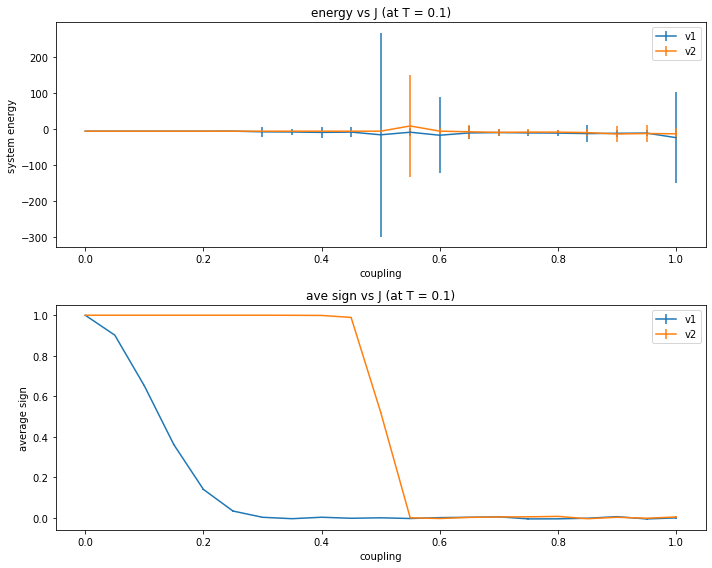

In [145]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(J1[0:],energy_j_v1[0:,0], yerr = energy_j_v1[0:,1], label='v1')
ax1.errorbar(J1[0:],energy_j_v2[0:,0], yerr = energy_j_v2[0:,1], label='v2')
# ax1.errorbar(J1[0:],energy_j_v3[0:,0], yerr = energy_j_v3[0:,1], label='v3')


ax1.set_title(f'energy vs J (at T = {T})')
ax1.set_xlabel('coupling')
ax1.set_ylabel('system energy')
# ax1.set_ylim(-120, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)

ax1.errorbar(J1[0:],sign_j_v1[0:,0], yerr = sign_j_v1[0:,1], label='v1')
ax1.errorbar(J1[0:],sign_j_v2[0:,0], yerr = sign_j_v2[0:,1], label='v2')
# ax1.errorbar(J1[0:],sign_j_v3[0:,0], yerr = sign_j_v3[0:,1], label='v3')


ax1.set_title(f'ave sign vs J (at T = {T})')
ax1.set_xlabel('coupling')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()

plt.show()

In [138]:
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)
ax.plot(J1, dimer_j_v2)

ax.set_title(f'dimer vs J (at T = {T})')
ax.set_xlabel('J')
ax.set_ylabel('dimer operator')
# ax1.set_ylim(-120, 0)
ax.legend()
plt.show()


0.375

## more detail about average sign of SS model

In [3]:
J1 = 0.1

In [8]:
import subprocess
import numpy as np
energy_array = []
sign_array = []
time_array = []
dimer_array = []
T =  5*np.logspace(-3, -2, num=11)
for t in T:
    out = subprocess.Popen(["./SS", 
                            "-L", 
                            "2", 
                            "-T", 
                            "{:.4f}".format(t), 
                            "-J1", f"{J1}",
                            "-m", "20000", 
                            "-n", "100000", 
                            "-M", "shastry_v2",
                            "-PATH1", "../python/array/SS_bond_test1.npy",
                            "-PATH2", "../python/array/SS_bond_test2.npy",
                            "-PATH3", "../python/array/SS_onsite.npy",
                            "-wdty" , "20"
                           ], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()
    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t} time = {time}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    dimer_array.append(dimer)

T = 0.005 time = [36.347] [-6.29185, 0.00834492]
T = 0.0062946270589708374 time = [27.178] [-6.29376, 0.00691493]


KeyboardInterrupt: 

In [8]:
"{:.4f}".format(t), 

('0.0100',)

In [66]:
dimer_j_mod = np.array(dimer_array)
sign_j_mod = np.array(sign_array)

In [68]:
sign_j_mod

array([[1.00000e+00, 0.00000e+00],
       [1.00000e+00, 0.00000e+00],
       [9.73880e-01, 7.18041e-04],
       [9.82640e-01, 5.86677e-04],
       [9.83700e-01, 5.68636e-04],
       [9.89180e-01, 4.63930e-04],
       [9.90800e-01, 4.27967e-04],
       [9.92580e-01, 3.84514e-04],
       [9.93760e-01, 3.52721e-04],
       [9.94860e-01, 3.20214e-04],
       [9.96000e-01, 2.82561e-04]])

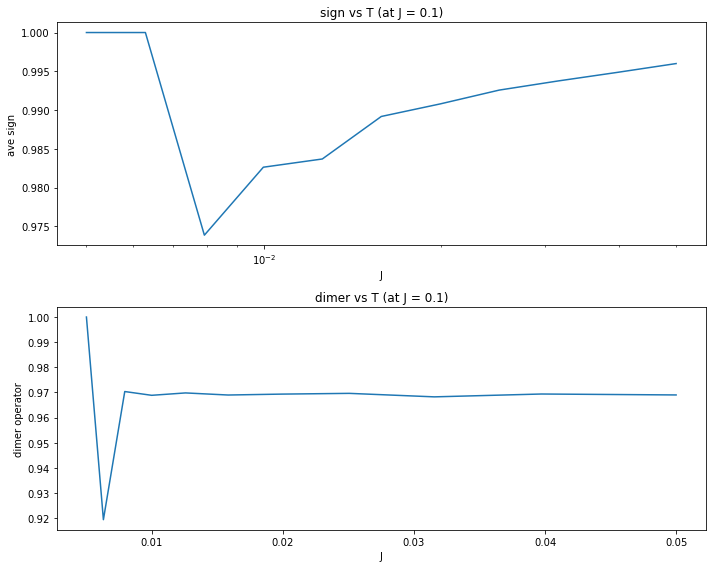

In [67]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(2,1,1)
ax.plot(T, sign_j_mod[:,0])

ax.set_title(f'sign vs T (at J = {J1})')
ax.set_xlabel('J')
ax.set_ylabel('ave sign')
# ax.set_ylim()

ax.set_xscale("log")

ax = fig.add_subplot(2,1,2)
ax.plot(T, dimer_j_mod)

ax.set_title(f'dimer vs T (at J = {J1})')
ax.set_xlabel('J')
ax.set_ylabel('dimer operator')
plt.tight_layout()

plt.savefig(f"../doc/img/avesign_modham_dtl_J1_v2={J1}.png")
plt.show()

In [28]:
import functions as f

def update_state(s, leg, fl):
    pows = [1,4,16,64,256]
    t = pows[leg+1];
    a = pows[leg];
    return int((s//t)*t + (s%t+fl*a) % t);

In [30]:
s = 69
print(f.num2state(s, L=4, nls=2,rev=True))
s = update_state(s,3,2)
print(f.num2state(s, L=4, nls=2,rev=True))

[1, 1, 0, 1]
[1, 1, 0, 3]


In [21]:
import numpy as np
f.state2num(np.array([2,0]), nls=2, rev = True)

2

In [54]:
s = 17
print(f.num2state(s, L=4, nls=2,rev=True))

[1, 0, 1, 0]
